In [89]:

using Plots
include("numerical_integration.jl")
 
NUM_STEPS=500

function logistic_growth(x,p)
    r,K = p

    x = x[1]
    println(x)
    dx_dt = r*x*(1-(x/K))
    println(dx_dt)
    return dx_dt
end

function SIR(x,p)
    #unpack vector
    β,γ= p 
    S,I,R = x
    N = S+I+R
    #calculate differenitals
    dS = -(β*S*I)/N
    dI = (β*S*I)/N - γ*I
    dR = γ*I
    
    dX = [dS dI dR]#pack differentials into an array
    return dX
end



SIR (generic function with 1 method)

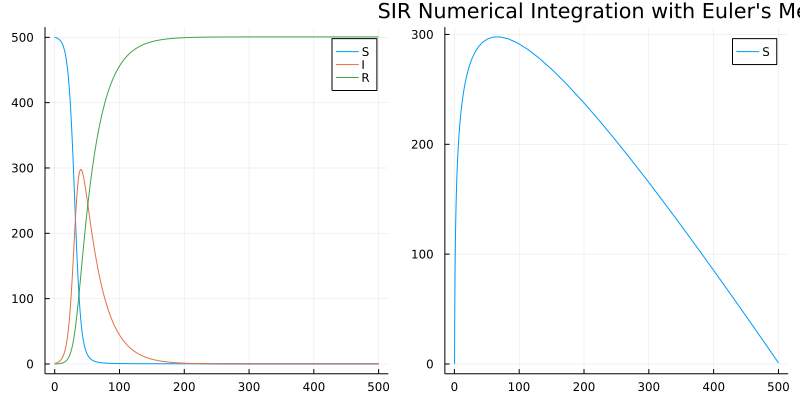

In [127]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



SIR_euler_ts = plot(time_range,[s,i,r],labels = ['S' 'I' 'R'])
SIR_euler_phase_space = plot(s,i,labels = ['S' 'I'],title = "SIR Numerical Integration with Euler's Method")

plot!(size=(800,400))
plot(SIR_euler_ts,SIR_euler_phase_space,layout = (1,2))
##savefig("plots/sir_euler.png")

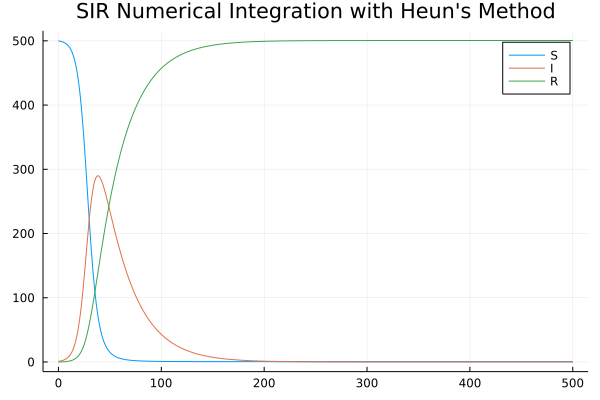

In [91]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS 

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Heun's Method")
#savefig("plots/sir_heun.png")

In [92]:
function lorenz(x,p)
    ρ,σ,β= p
    X,Y,Z = x
    dX = σ*(Y-X)
    dY = X*(ρ-Z)-Y
    dZ = (X*Y)-(β*Z)

    return_x = [dX dY dZ]

    return return_x
end

    


lorenz (generic function with 1 method)

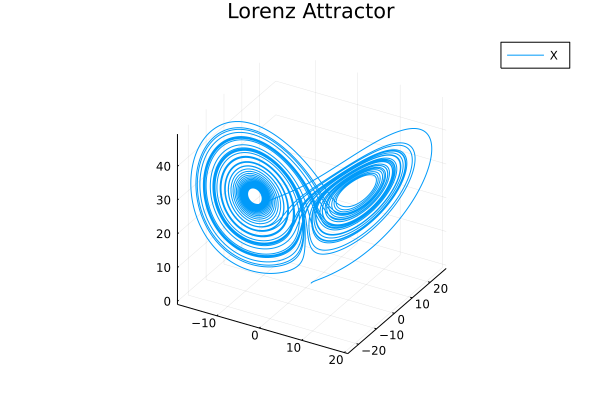

In [102]:
#SIR MODEL with 
x_0 = [1 0.5 0.5]
p = [28,10,8/3]
max_time = 50
num_steps = 50000

time_range,SIR_results = ODESolver(lorenz,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
X,Y,Z = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]
plot(X,Y,Z,labels = ['X' 'Y' 'Z'],title = "Lorenz Attractor")

In [66]:
function lotka_volterra(x,p)
    α,β,δ,γ= p
    X,Y = x
    dX = (α*X)-(β*X*Y)
    dY = (δ*X*Y)-(γ*Y)

    return_x = [dX dY]

    return return_x
end

lotka_volterra (generic function with 1 method)

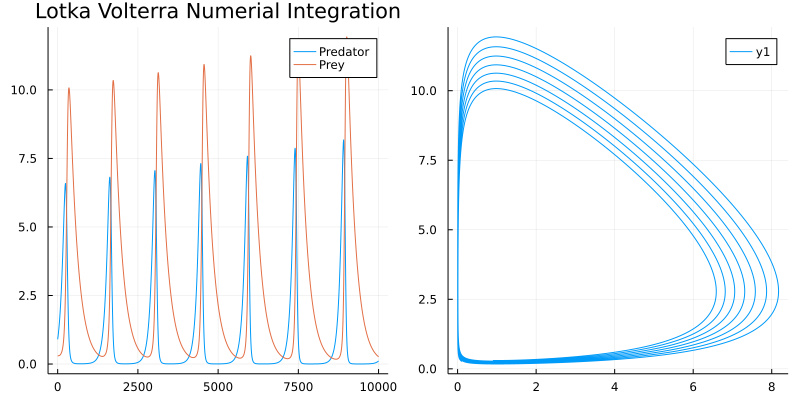

In [119]:
#SIR MODEL with 
x_0 = [.9 .3]
#p = [2/3,4/3,1,1]
p = [1.1,0.4,0.4,0.4]
max_time = 100
num_steps = max_time*100

time_range,lotka_volterra_results = ODESolver(lotka_volterra,x_0,p,max_time,num_steps,eulers_method)
lotka_volterra_matrix = vcat(lotka_volterra_results...)
X,Y = lotka_volterra_matrix[:,1],lotka_volterra_matrix[:,2]



lotka_volterra_ts = plot(time_range,[X,Y],labels = ["Predator" "Prey" ],title = "Lotka Volterra Numerial Integration")
lotka_volterra_phase_space = plot(X,Y,title = "")
plot!(size=(800,400))
plot(lotka_volterra_ts,lotka_volterra_phase_space,layout = (1,2))

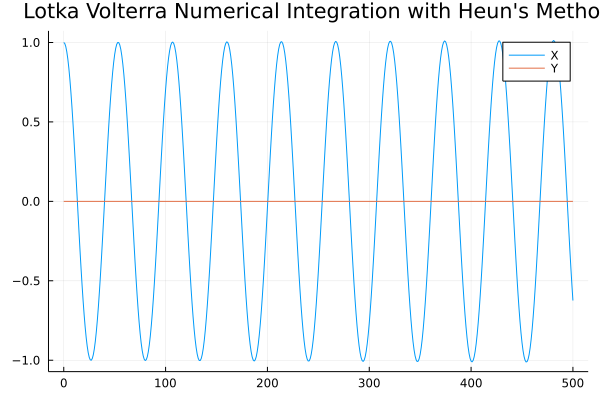

In [73]:
function SHO(x,p)
    "Linerized SHO"
    g,L= p
    θ,ω = x
    dω = -g/L*sin(θ)
    dθ =  ω

    return_x = [dθ dω]

    return return_x
end


#SIR MODEL with 
x_0 = [1 0]
p = [9.8,1]
max_time = 20 
num_steps = 500 

time_range,sho_results = ODESolver(SHO,x_0,p,max_time,num_steps,heuns_method)
sho_matrix = vcat(sho_results...)
X,Y = sho_matrix[:,1],sir_matrix[:,2]

plot(time_range,[X,Y],labels = ['X' 'Y' ],title = "Lotka Volterra Numerical Integration with Heun's Method")

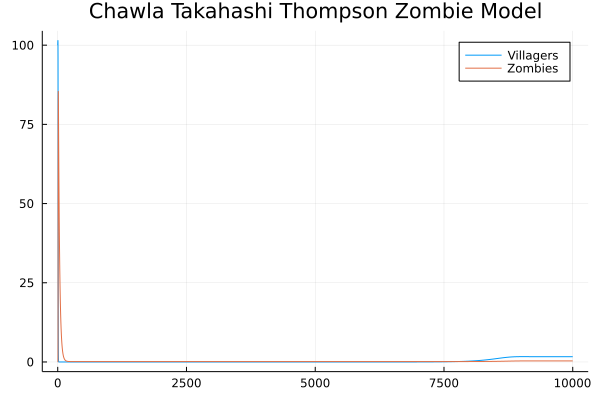

In [249]:
function zombie_model(x,p)

    """
    α_v =  villager birth rate
    α_z = zombie birth rate
    β = infection rate
    γ = zombie death rate
    """

    α_v,α_z,β,γ= p

    V,Z = x
    dV = α_v*V-β*V*Z 
    dZ = α_z+β*V*Z-γ*Z

    return_x = [dV dZ]

    return return_x
end



#SIR MODEL with 

villager_birth_rate = 0.1
zombie_birth_rate = 0.1
infection_rate = 0.3
zombie_death_rate = 0.8

x_0 = [100 0]
p = [villager_birth_rate,zombie_birth_rate,infection_rate,zombie_death_rate]
max_time = 500
num_steps = 10000

time_range,sho_results = ODESolver(zombie_model,x_0,p,max_time,num_steps,heuns_method)
sho_matrix = vcat(sho_results...)
X,Y = sho_matrix[:,1],sho_matrix[:,2]

plot(time_range,[X Y],labels = ["Villagers" "Zombies" ],title = "Chawla Takahashi Thompson Zombie Model")

In [233]:
sho_matrix = vcat(sho_results[530:550]...)
X,Y = sho_matrix[:,1],sir_matrix[:,2]
println(length(X))
println(length(Y))


21
501


In [234]:
Y

501-element Vector{Float64}:
  1.0
  1.2137867122897064
  1.4731270646695371
  1.7876561447718806
  2.1690131904108547
  2.6312424974568183
  3.191266938404413
  3.8694435634630207
  4.6902100751575135
  5.682828992005793
  6.882232327852154
  8.329962603861462
 10.075194612351186
  ⋮
  3.410780753807234e-5
  3.2895190522321955e-5
  3.1725685044073834e-5
  3.05977583814265e-5
  2.9509932304536623e-5
  2.8460781138291483e-5
  2.74489298938582e-5
  2.647305246666103e-5
  2.553186989842503e-5
  2.462414870100836e-5
  2.37486992398265e-5
  2.2904374174749734e-5

In [225]:
X

551-element Vector{Float64}:
 100.0
 101.83471074380165
 103.70308312273751
 105.60573473044393
 107.54329449161406
 109.51640286988996
 111.52571207956893
 113.57188630119408
 115.65560190110028
 117.77754765498824
 119.93842497560043
 122.13894814457426
 124.37984454854909
   ⋮
   1.802414207162822e6
   1.8354832942694456e6
   1.8691591034700917e6
   1.9034527663602042e6
   1.9383756187678047e6
   1.9739392045005695e6
   2.0101552791616544e6
   2.0470358140355295e6
   2.084593000045107e6
   2.1228392517814715e6
   2.1617872116075447e6
   2.2014497538370383e6